In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
# Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 


In [ ]:
sns.countplot(taxi['icon'])

plt.figure(figsize=(10,5))  # задаем размеры
sns.countplot(data=taxi, hue='end_state', x='source') 
plt.show()

ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()


taxi = pd.read_csv('/3_taxi_peru.csv', encoding='windows-1251', sep = ';')
taxi

In [2]:
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/python_lessons/3_logs.csv')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [3]:
user = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-gazizova/python_lessons/3_user_data.csv')
user

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
# Вопрос: Сколько уникальных значений принимает переменная platform?
    
logs.platform.nunique()

3

In [ ]:
# Какой клиент совершил больше всего успешных операций?

In [5]:
suc_log = logs.query("success == True").client.value_counts()
#suc_log = logs.loc[logs.success==True].client.value_counts()
max_n = suc_log.max()
suc_log

36165    41
61468    41
12179    41
61473    41
78349    41
         ..
36194     1
57752     1
84618     1
53228     1
36864     1
Name: client, Length: 2845, dtype: int64

In [6]:
max_suc_user = suc_log.loc[suc_log==max_n]
max_suc_user.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

In [7]:
# С какой платформы осуществляется наибольшее количество успешных операций?

#logs.query("success == True").platform.value_counts()

logs.loc[logs.success==True].platform.value_counts() #.idxmax()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [8]:
logs_user = logs.merge(user, on='client')
logs_user

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [9]:
# Какая платформа наиболее популярна среди премиумных клиентов?

logs_user.groupby('platform').agg({'premium':'count'})

,premium
platform,
computer,1140
phone,2117
tablet,182


In [10]:
#logs_user.query("premium==True").groupby('platform', as_index=False).agg({'premium':'count'})
prem_logs = logs_user.loc[logs_user.premium==True].platform.value_counts()
prem_logs

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

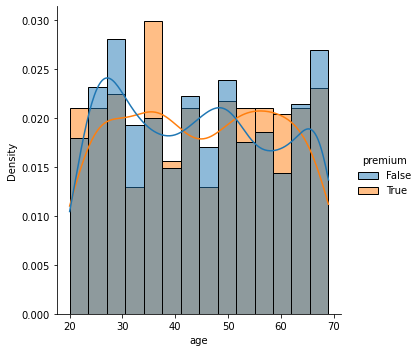

In [12]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум), 
# используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

#Используйте датасет, который вы получили на предыдущем шаге

import seaborn as sns

sns.displot(data=logs_user, x='age', hue='premium', kde=True, kind='hist', stat='density', common_norm=False, bins=14)


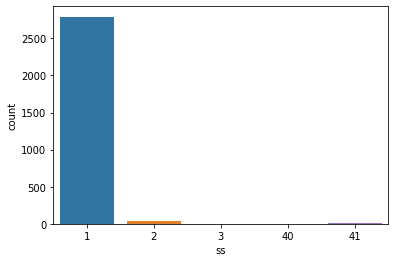

In [13]:
# Постройте график распределения числа успешных операций:  x – число успешных операций

s_count = logs.query("success == True").client.value_counts()
s_count = s_count.rename('ss')
sns.countplot(x=s_count)

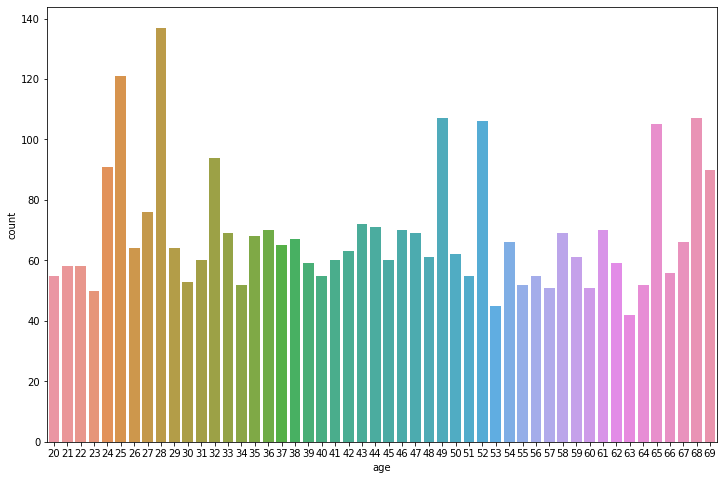

In [15]:
# Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. 
# По оси x – возраст, y – число успешных операций. 
# Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

plt.figure(figsize=(12, 8))
sns.countplot(data=logs_user, x='age')